In [1]:
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tslearn.clustering import KShape
from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
lam_point_data = "YOUR_PATH\\data\\lam_point_data"

In [3]:
weekday_index = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]

# NOT GIVING CORRECT WEEKDAYS SINCE FIRST DAY IS NOT MONDAY
def read_image_data(path):
    split_path = path.split("_")
    lam_id = split_path[7]
    img = Image.open(path)
    width, height = img.size
    img_bytes = img.tobytes()
    
    data = {
        "mon": [],
        "tue": [],
        "wed": [],
        "thu": [],
        "fri": [],
        "sat": [],
        "sun": []
    }
    
    for i in range(width):
        is_empty = img_bytes[(height-2) * width + i] == 255
        if not is_empty:
            col = img_bytes[i:(height-2)*width:width]
            data[weekday_index[i%7]].append(np.array(bytearray(col), dtype="uint8"))
                            
    count = 0
    for day in weekday_index:
        count += len(data[day])
    
    print(f"Found {count} non-empty days for lam {lam_id}")
    return data
        

In [5]:
data = read_image_data(f"{lam_point_data}\\CarCount\\CarCount_interval5_greyscale_lam_1_year_2016.bmp")

Found 365 non-empty days for lam 1


In [6]:
day_data = []
for day in weekday_index:
    day_data = day_data + data[day]
    
full_data = np.stack(day_data)
X_train = TimeSeriesScalerMeanVariance().fit_transform(full_data)
sz = X_train.shape[1]

0.066 --> 0.024 --> 0.016 --> 0.016 --> 0.015 --> 0.015 --> 0.015 --> 0.014 --> 0.014 --> 0.014 --> 0.013 --> 0.013 --> 0.013 --> 0.012 --> 0.012 --> 0.012 --> 0.011 --> 0.011 --> 0.011 --> 0.010 --> 0.010 --> 0.010 --> 0.010 --> 


IndexError: index 2 is out of bounds for axis 0 with size 2

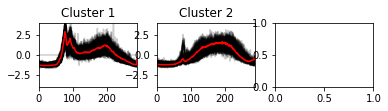

In [7]:
# kShape clustering
ks = KShape(n_clusters=2, verbose=True)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(7):
    plt.subplot(3, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [8]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
data["mon"][40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [10]:
full_data.shape

(365, 288)

In [11]:
df = pd.DataFrame(np.transpose(full_data))

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,23.493056,31.694444,35.177083,35.586806,37.076389,45.607639,36.170139,36.281250,40.114583,40.690972,...,40.243056,38.361111,34.111111,35.888889,37.559028,37.621528,35.930556,38.562500,38.427083,38.621528
std,24.040325,24.361327,27.531924,27.257312,27.678991,34.520340,27.496637,27.405092,31.379614,29.982777,...,30.704106,28.977129,27.913658,29.001769,30.152747,29.276154,28.833694,30.269111,27.955569,27.417647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,8.000000,6.000000,8.000000,9.500000,11.000000,10.000000,10.000000,10.000000,9.500000,...,9.500000,11.000000,10.000000,8.000000,6.000000,10.000000,8.000000,9.500000,10.750000,11.000000
50%,11.000000,32.000000,35.000000,37.500000,37.000000,50.000000,37.000000,37.000000,40.000000,43.000000,...,42.000000,37.000000,33.000000,37.000000,38.000000,37.000000,35.000000,36.000000,42.000000,42.000000
75%,40.000000,52.500000,55.000000,57.000000,59.000000,69.000000,57.000000,59.000000,61.250000,66.000000,...,62.500000,59.000000,50.500000,55.000000,57.000000,57.000000,54.000000,59.000000,59.000000,59.000000
max,94.000000,93.000000,110.000000,106.000000,110.000000,181.000000,98.000000,103.000000,122.000000,110.000000,...,125.000000,152.000000,132.000000,154.000000,135.000000,145.000000,135.000000,135.000000,123.000000,98.000000
